In [1]:
import datetime

from model import *
from random_search import *
from grid_search import *
from experiment_helper import *
from bayesian_optimizer import *

%load_ext autoreload
%autoreload 2

### Experiment 2: Model architecture tuning

In [3]:
# fixed parameters
lr = 0.1
momentum = 0.9
mini_batch_size = 50
num_epochs = 300

# variable parameters
num_hidden_min, num_hidden_max, num_hidden_n = 2,512, 9
num_layers_min, num_layers_max, num_layers_n = 2, 6, 5


# experiment parameters
seed = 0
num_trials = 45

#### Random search

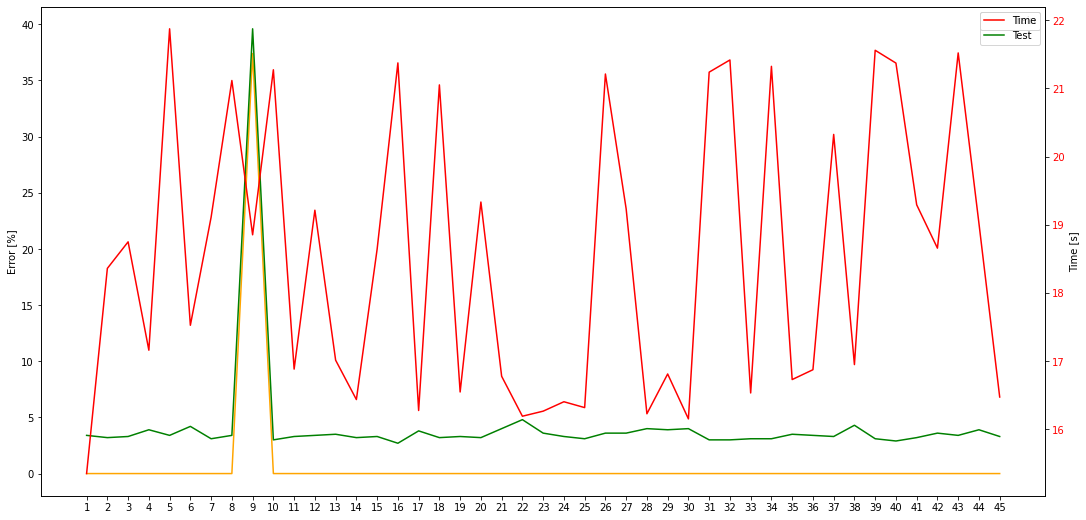

In [5]:
parameters_range = {'lr': (lr, lr, 'fixed'),
                    'mini_batch_size': (mini_batch_size, mini_batch_size, 'fixed'),
                    'momentum': (momentum, momentum, 'fixed'),
                    'num_hidden': (num_hidden_min, num_hidden_max, 'discrete'),
                    'num_layers': (num_layers_min, num_layers_max, 'discrete_loguniform_2'),
                    'num_epochs': (num_epochs, num_epochs, 'fixed')}
parameters = random_hyperparameters(parameters_range,num_trials, seed)
results = random_search(parameters)
visualize_experiment(results,'random2-')

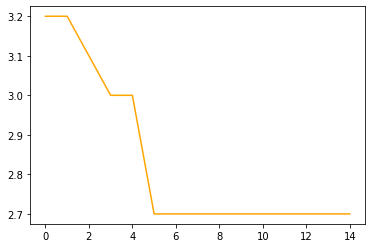

(range(0, 15),
 array([3.2, 3.2, 3.1, 3. , 3. , 2.7, 2.7, 2.7, 2.7, 2.7, 2.7, 2.7, 2.7,
        2.7, 2.7]))

In [6]:
visualize_run_time(results)

#### Grid search

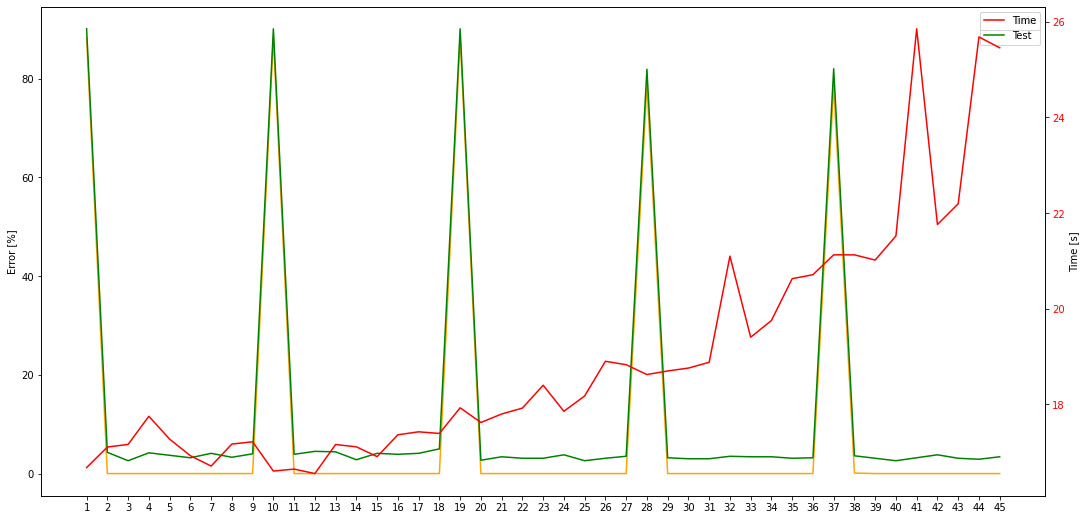

In [8]:
parameters_range = {'lr': (lr, lr, 1, 'fixed'),
                    'mini_batch_size': (mini_batch_size, mini_batch_size, 1, 'fixed'),
                    'momentum': (momentum, momentum, 1, 'fixed'),
                    'num_hidden': (num_hidden_min, num_hidden_max, num_hidden_n, 'discrete_linspace'),
                    'num_layers': (num_layers_min, num_layers_max, num_layers_n, 'discrete_logspace_2'),
                    'num_epochs': (num_epochs, num_epochs, 1, 'fixed')}
parameters = grid_hyperparameters(parameters_range)
results = grid_search(parameters)
visualize_experiment(results,'grid2-')

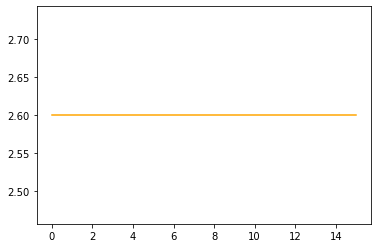

(range(0, 16),
 array([2.6, 2.6, 2.6, 2.6, 2.6, 2.6, 2.6, 2.6, 2.6, 2.6, 2.6, 2.6, 2.6,
        2.6, 2.6, 2.6]))

In [9]:
visualize_run_time(results)

#### Bayesian optimisation

 C:\Users\Doo\anaconda3\lib\site-packages\paramz\transformations.py:111: RuntimeWarning:overflow encountered in expm1


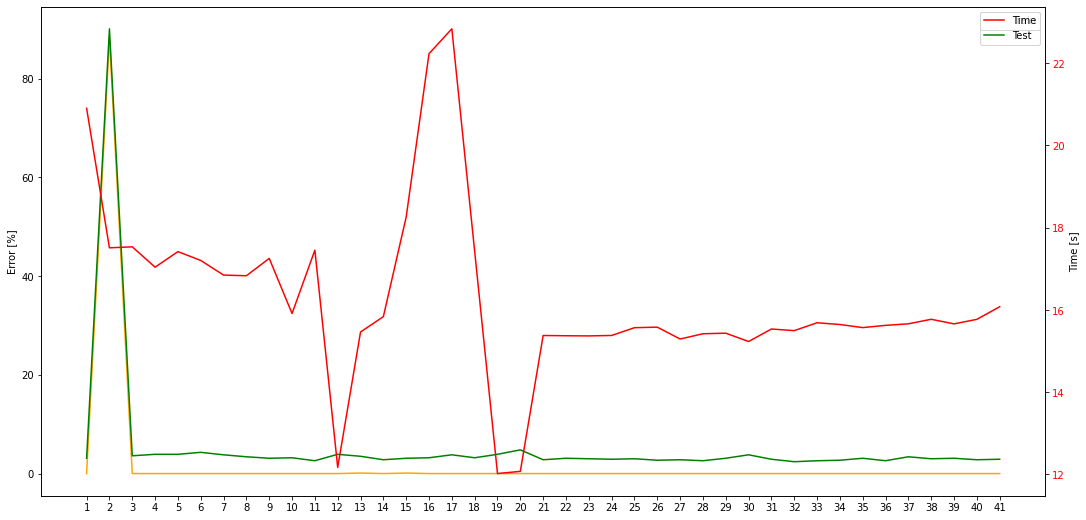

In [11]:
parameters_range = {'lr': (lr, lr, 1, 'fixed'),
                    'mini_batch_size': (mini_batch_size, mini_batch_size, 1, 'fixed'),
                    'momentum': (momentum, momentum, 1, 'fixed'),
                    'num_hidden': (num_hidden_min, num_hidden_max, num_hidden_n, 'discrete_linspace'),
                    'num_layers': (num_layers_min, num_layers_max, num_layers_n, 'discrete_logspace_2'),
                    'num_epochs': (num_epochs, num_epochs, 1, 'fixed')}
bo_optimizer = TuneBO( parameters_range=parameters_range)
bo_optimizer.run(num_evals=40)
results=bo_optimizer.evaluation_history
visualize_experiment(results,'bayesian2-')

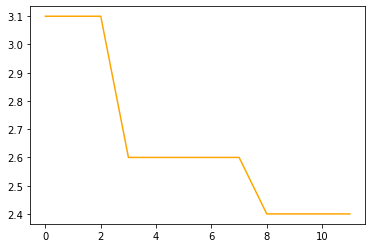

(range(0, 12),
 array([3.1, 3.1, 3.1, 2.6, 2.6, 2.6, 2.6, 2.6, 2.4, 2.4, 2.4, 2.4]))

In [12]:
visualize_run_time(results)